### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

### Load your data file

In [ ]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

#### Plot data

            Temperature
Date                   
1981-01-01         20.7
1981-01-02         17.9
1981-01-03         18.8
1981-01-04         14.6
1981-01-05         15.8


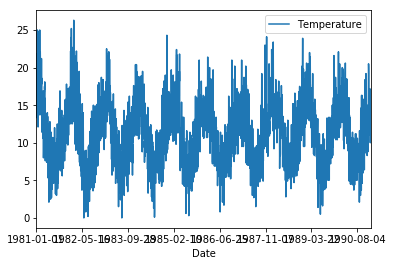

In [12]:
df = pd.read_csv('daily-minimum-temperatures-in-me.csv', index_col='Date')
print(df.head())
df.plot()

In [13]:
# Data Cleansing
columns_to_keep = ['Temperature']
df = df[columns_to_keep]
df.index.names = ['Date']
df.sort_index(inplace=True)
print('Total rows: {}'.format(len(df)))
df.head()

Total rows: 3650


,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


# Check for Describe

In [14]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [15]:
# Null Values?
df.isnull().sum()

Temperature    0
dtype: int64

In [16]:
print(df.isnull().any(axis=1).sum())

0


In [17]:
df.dropna(inplace=True)

## Check for null

In [18]:
df.isnull().sum()

Temperature    0
dtype: int64

### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016F28D85048>]],
      dtype=object)

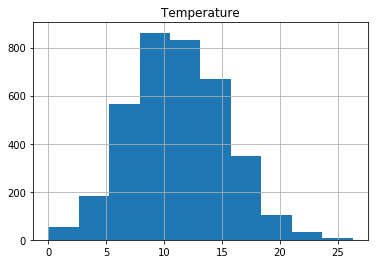

In [19]:
df.hist(bins=10)

### Check the maximum and minimum values

In [21]:
# Scaled Data
print('Min', np.min(df))
print('Max', np.max(df))

Min Temperature    0.0
dtype: float64
Max Temperature    26.3
dtype: float64


In [22]:
dataset = df.astype('float32')

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

F:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [24]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [25]:
print(scaled[:10])

[[0.7870723 ]
 [0.68060837]
 [0.71482889]
 [0.55513311]
 [0.60076048]
 [0.60076048]
 [0.60076048]
 [0.66159696]
 [0.82889733]
 [0.7604563 ]]


### Split data into Training and Testing

In [26]:
#Create the model
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


In [27]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [28]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

2555 1
0
X 0 to 1
[0.7870723]
Y 1
0.6806083702582986
1
X 1 to 2
[0.68060837]
Y 2
0.7148288890658444
2
X 2 to 3
[0.71482889]
Y 3
0.5551331104563756
3
X 3 to 4
[0.55513311]
Y 4
0.6007604809535642
4
X 4 to 5
[0.60076048]
Y 5
0.6007604809535642
5
X 5 to 6
[0.60076048]
Y 6
0.6007604809535642
6
X 6 to 7
[0.60076048]
Y 7
0.6615969628626882
7
X 7 to 8
[0.66159696]
Y 8
0.8288973334395067
8
X 8 to 9
[0.82889733]
Y 9
0.7604562958244149
9
X 9 to 10
[0.7604563]
Y 10
0.6159696286268815
10
X 10 to 11
[0.61596963]
Y 11
0.5057034439755123
11
X 11 to 12
[0.50570344]
Y 12
0.6349810360224919
12
X 12 to 13
[0.63498104]
Y 13
0.817490518011246
13
X 13 to 14
[0.81749052]
Y 14
0.9505703697805186
14
X 14 to 15
[0.95057037]
Y 15
0.7870722951873749
15
X 15 to 16
[0.7870723]
Y 16
0.7832699992037001
16
X 16 to 17
[0.78327]
Y 17
0.9429657778131689
17
X 17 to 18
[0.94296578]
Y 18
0.6730038508137127
18
X 18 to 19
[0.67300385]
Y 19
0.5893536292639215
19
X 19 to 20
[0.58935363]
Y 20
0.6920152582093231
20
X 20 to 21
[0.6

0.4182509627034282
353
X 353 to 354
[0.41825096]
Y 354
0.42205325868710303
354
X 354 to 355
[0.42205326]
Y 355
0.5703422218683112
355
X 355 to 356
[0.57034222]
Y 356
0.4866920365799019
356
X 356 to 357
[0.48669204]
Y 357
0.5703422218683112
357
X 357 to 358
[0.57034222]
Y 358
0.5399239627830582
358
X 358 to 359
[0.53992396]
Y 359
0.5323194070770905
359
X 359 to 360
[0.53231941]
Y 360
0.5893536292639215
360
X 360 to 361
[0.58935363]
Y 361
0.5057034439755123
361
X 361 to 362
[0.50570344]
Y 362
0.5931559252475964
362
X 362 to 363
[0.59315593]
Y 363
0.5779467775742789
363
X 363 to 364
[0.57794678]
Y 364
0.6615969628626882
364
X 364 to 365
[0.66159696]
Y 365
0.6463878514507526
365
X 365 to 366
[0.64638785]
Y 366
0.5703422218683112
366
X 366 to 367
[0.57034222]
Y 367
0.51330799968148
367
X 367 to 368
[0.513308]
Y 368
0.5779467775742789
368
X 368 to 369
[0.57794678]
Y 369
0.49429659228586964
369
X 369 to 370
[0.49429659]
Y 370
0.4752851848902593
370
X 370 to 371
[0.47528518]
Y 371
0.5361217030

Y 653
0.3726235922062397
653
X 653 to 654
[0.37262359]
Y 654
0.2851711109341556
654
X 654 to 655
[0.28517111]
Y 655
0.2205323330413567
655
X 655 to 656
[0.22053233]
Y 656
0.3726235922062397
656
X 656 to 657
[0.37262359]
Y 657
0.3003802404767821
657
X 657 to 658
[0.30038024]
Y 658
0.3307984814313441
658
X 658 to 659
[0.33079848]
Y 659
0.38022814791220744
659
X 659 to 660
[0.38022815]
Y 660
0.40304185129149267
660
X 660 to 661
[0.40304185]
Y 661
0.30418251832976595
661
X 661 to 662
[0.30418252]
Y 662
0.3878327036181752
662
X 662 to 663
[0.3878327]
Y 663
0.574144517851986
663
X 663 to 664
[0.57414452]
Y 664
0.5285171110934156
664
X 664 to 665
[0.52851711]
Y 665
0.34980988882695446
665
X 665 to 666
[0.34980989]
Y 666
0.34220533312098667
666
X 666 to 667
[0.34220533]
Y 667
0.5019011479918374
667
X 667 to 668
[0.50190115]
Y 668
0.26615970353854523
668
X 668 to 669
[0.2661597]
Y 669
0.40304185129149267
669
X 669 to 670
[0.40304185]
Y 670
0.2623574256855613
670
X 670 to 671
[0.26235743]
Y 671


Y 953
0.28897338878713946
953
X 953 to 954
[0.28897339]
Y 954
0.2205323330413567
954
X 954 to 955
[0.22053233]
Y 955
0.3231939257253763
955
X 955 to 956
[0.32319393]
Y 956
0.5247148513711226
956
X 956 to 957
[0.52471485]
Y 957
0.543726258766733
957
X 957 to 958
[0.54372626]
Y 958
0.31558937001940857
958
X 958 to 959
[0.31558937]
Y 959
0.20152092564574633
959
X 959 to 960
[0.20152093]
Y 960
0.11406844437366223
960
X 960 to 961
[0.11406844]
Y 961
0.1977186296620715
961
X 961 to 962
[0.19771863]
Y 962
0.39163499960185005
962
X 962 to 963
[0.391635]
Y 963
0.42205325868710303
963
X 963 to 964
[0.42205326]
Y 964
0.3992395553078178
964
X 964 to 965
[0.39923956]
Y 965
0.34220533312098667
965
X 965 to 966
[0.34220533]
Y 966
0.49429659228586964
966
X 966 to 967
[0.49429659]
Y 967
0.24334601828995095
967
X 967 to 968
[0.24334602]
Y 968
0.3193916297417015
968
X 968 to 969
[0.31939163]
Y 969
0.2547528518489026
969
X 969 to 970
[0.25475285]
Y 970
0.31558937001940857
970
X 970 to 971
[0.31558937]
Y 9

[0.42205326]
Y 1253
0.3536121848106293
1253
X 1253 to 1254
[0.35361218]
Y 1254
0.38403044389588226
1254
X 1254 to 1255
[0.38403044]
Y 1255
0.1482889813118991
1255
X 1255 to 1256
[0.14828898]
Y 1256
0.19011407395610372
1256
X 1256 to 1257
[0.19011407]
Y 1257
0.3117870740357337
1257
X 1257 to 1258
[0.31178707]
Y 1258
0.10646387960234899
1258
X 1258 to 1259
[0.10646388]
Y 1259
0.1634981108545256
1259
X 1259 to 1260
[0.16349811]
Y 1260
0.30798481431344077
1260
X 1260 to 1261
[0.30798481]
Y 1261
0.42205325868710303
1261
X 1261 to 1262
[0.42205326]
Y 1262
0.1787072222664611
1262
X 1262 to 1263
[0.17870722]
Y 1263
0.20152092564574633
1263
X 1263 to 1264
[0.20152093]
Y 1264
0.38022814791220744
1264
X 1264 to 1265
[0.38022815]
Y 1265
0.21292775920469798
1265
X 1265 to 1266
[0.21292776]
Y 1266
0.08365019435375473
1266
X 1266 to 1267
[0.08365019]
Y 1267
0.2699619813915291
1267
X 1267 to 1268
[0.26996198]
Y 1268
0.31558937001940857
1268
X 1268 to 1269
[0.31558937]
Y 1269
0.3269962217090512
1269
X 

[0.59695818]
Y 1553
0.6692015548300378
1553
X 1553 to 1554
[0.66920155]
Y 1554
0.665399258846363
1554
X 1554 to 1555
[0.66539926]
Y 1555
0.604562740675857
1555
X 1555 to 1556
[0.60456274]
Y 1556
0.6159696286268815
1556
X 1556 to 1557
[0.61596963]
Y 1557
0.6083650366595319
1557
X 1557 to 1558
[0.60836504]
Y 1558
0.604562740675857
1558
X 1558 to 1559
[0.60456274]
Y 1559
0.6159696286268815
1559
X 1559 to 1560
[0.61596963]
Y 1560
0.6159696286268815
1560
X 1560 to 1561
[0.61596963]
Y 1561
0.7414448884288045
1561
X 1561 to 1562
[0.74144489]
Y 1562
0.6920152582093231
1562
X 1562 to 1563
[0.69201526]
Y 1563
0.8288973334395067
1563
X 1563 to 1564
[0.82889733]
Y 1564
0.574144517851986
1564
X 1564 to 1565
[0.57414452]
Y 1565
0.4182509627034282
1565
X 1565 to 1566
[0.41825096]
Y 1566
0.30798481431344077
1566
X 1566 to 1567
[0.30798481]
Y 1567
0.3612167405165971
1567
X 1567 to 1568
[0.36121674]
Y 1568
0.3536121848106293
1568
X 1568 to 1569
[0.35361218]
Y 1569
0.40304185129149267
1569
X 1569 to 1570

X 1752 to 1753
[0.26996198]
Y 1753
0.3193916297417015
1753
X 1753 to 1754
[0.31939163]
Y 1754
0.38022814791220744
1754
X 1754 to 1755
[0.38022815]
Y 1755
0.4828897405962271
1755
X 1755 to 1756
[0.48288974]
Y 1756
0.38022814791220744
1756
X 1756 to 1757
[0.38022815]
Y 1757
0.3878327036181752
1757
X 1757 to 1758
[0.3878327]
Y 1758
0.24714829614293482
1758
X 1758 to 1759
[0.2471483]
Y 1759
0.34980988882695446
1759
X 1759 to 1760
[0.34980989]
Y 1760
0.4524714815109741
1760
X 1760 to 1761
[0.45247148]
Y 1761
0.5589353701786686
1761
X 1761 to 1762
[0.55893537]
Y 1762
0.4334600741153637
1762
X 1762 to 1763
[0.43346007]
Y 1763
0.25855514783257744
1763
X 1763 to 1764
[0.25855515]
Y 1764
0.2813688330811717
1764
X 1764 to 1765
[0.28136883]
Y 1765
0.42585551840939595
1765
X 1765 to 1766
[0.42585552]
Y 1766
0.34980988882695446
1766
X 1766 to 1767
[0.34980989]
Y 1767
0.47908748087393416
1767
X 1767 to 1768
[0.47908748]
Y 1768
0.6083650366595319
1768
X 1768 to 1769
[0.60836504]
Y 1769
0.6501901474344

X 2052 to 2053
[0.34600763]
Y 2053
0.3574144445329222
2053
X 2053 to 2054
[0.35741444]
Y 2054
0.2775665552281878
2054
X 2054 to 2055
[0.27756656]
Y 2055
0.3193916297417015
2055
X 2055 to 2056
[0.31939163]
Y 2056
0.34980988882695446
2056
X 2056 to 2057
[0.34980989]
Y 2057
0.2509505739959187
2057
X 2057 to 2058
[0.25095057]
Y 2058
0.3688212962225648
2058
X 2058 to 2059
[0.3688213]
Y 2059
0.47148288890658446
2059
X 2059 to 2060
[0.47148289]
Y 2060
0.3878327036181752
2060
X 2060 to 2061
[0.3878327]
Y 2061
0.2243346108943406
2061
X 2061 to 2062
[0.22433461]
Y 2062
0.2699619813915291
2062
X 2062 to 2063
[0.26996198]
Y 2063
0.2851711109341556
2063
X 2063 to 2064
[0.28517111]
Y 2064
0.3688212962225648
2064
X 2064 to 2065
[0.3688213]
Y 2065
0.46387833320061667
2065
X 2065 to 2066
[0.46387833]
Y 2066
0.21292775920469798
2066
X 2066 to 2067
[0.21292776]
Y 2067
0.2053232034987302
2067
X 2067 to 2068
[0.2053232]
Y 2068
0.31558937001940857
2068
X 2068 to 2069
[0.31558937]
Y 2069
0.40304185129149267


2348
X 2348 to 2349
[0.22433461]
Y 2349
0.33840303713731185
2349
X 2349 to 2350
[0.33840304]
Y 2350
0.49429659228586964
2350
X 2350 to 2351
[0.49429659]
Y 2351
0.47908748087393416
2351
X 2351 to 2352
[0.47908748]
Y 2352
0.2053232034987302
2352
X 2352 to 2353
[0.2053232]
Y 2353
0.22813688874732446
2353
X 2353 to 2354
[0.22813689]
Y 2354
0.2965779626237982
2354
X 2354 to 2355
[0.29657796]
Y 2355
0.34220533312098667
2355
X 2355 to 2356
[0.34220533]
Y 2356
0.15969581487085074
2356
X 2356 to 2357
[0.15969581]
Y 2357
0.11406844437366223
2357
X 2357 to 2358
[0.11406844]
Y 2358
0.17110266656049333
2358
X 2358 to 2359
[0.17110267]
Y 2359
0.23574144445329223
2359
X 2359 to 2360
[0.23574144]
Y 2360
0.4524714815109741
2360
X 2360 to 2361
[0.45247148]
Y 2361
0.4486692217886812
2361
X 2361 to 2362
[0.44866922]
Y 2362
0.3574144445329222
2362
X 2362 to 2363
[0.35741444]
Y 2363
0.3650190365002719
2363
X 2363 to 2364
[0.36501904]
Y 2364
0.3574144445329222
2364
X 2364 to 2365
[0.35741444]
Y 2365
0.266159

2552
X 2552 to 2553
[0.54372626]
Y 2553
0.5057034439755123
1095 1
0
X 0 to 1
[0.58174907]
Y 1
0.543726258766733
1
X 1 to 2
[0.54372626]
Y 2
0.51330799968148
2
X 2 to 3
[0.513308]
Y 3
0.5703422218683112
3
X 3 to 4
[0.57034222]
Y 4
0.5171102956651549
4
X 4 to 5
[0.5171103]
Y 5
0.5779467775742789
5
X 5 to 6
[0.57794678]
Y 6
0.6463878514507526
6
X 6 to 7
[0.64638785]
Y 7
0.7110266656049334
7
X 7 to 8
[0.71102667]
Y 8
0.6273764440551423
8
X 8 to 9
[0.62737644]
Y 9
0.6615969628626882
9
X 9 to 10
[0.66159696]
Y 10
0.695817481670234
10
X 10 to 11
[0.69581748]
Y 11
0.695817481670234
11
X 11 to 12
[0.69581748]
Y 12
0.8517110368187919
12
X 12 to 13
[0.85171104]
Y 13
0.8136882220275712
13
X 13 to 14
[0.81368822]
Y 14
0.7946768146319608
14
X 14 to 15
[0.79467681]
Y 15
0.6692015548300378
15
X 15 to 16
[0.66920155]
Y 16
0.5893536292639215
16
X 16 to 17
[0.58935363]
Y 17
0.6311787400388171
17
X 17 to 18
[0.63117874]
Y 18
0.6159696286268815
18
X 18 to 19
[0.61596963]
Y 19
0.5931559252475964
19
X 19 to 

[0.54372626]
Y 299
0.42965781439307077
299
X 299 to 300
[0.42965781]
Y 300
0.2775665552281878
300
X 300 to 301
[0.27756656]
Y 301
0.4866920365799019
301
X 301 to 302
[0.48669204]
Y 302
0.4524714815109741
302
X 302 to 303
[0.45247148]
Y 303
0.543726258766733
303
X 303 to 304
[0.54372626]
Y 304
0.4410646660827134
304
X 304 to 305
[0.44106467]
Y 305
0.5019011479918374
305
X 305 to 306
[0.50190115]
Y 306
0.5893536292639215
306
X 306 to 307
[0.58935363]
Y 307
0.5361217030607652
307
X 307 to 308
[0.5361217]
Y 308
0.3612167405165971
308
X 308 to 309
[0.36121674]
Y 309
0.273764259244513
309
X 309 to 310
[0.27376426]
Y 310
0.4486692217886812
310
X 310 to 311
[0.44866922]
Y 311
0.638783259483403
311
X 311 to 312
[0.63878326]
Y 312
0.4752851848902593
312
X 312 to 313
[0.47528518]
Y 313
0.3574144445329222
313
X 313 to 314
[0.35741444]
Y 314
0.4524714815109741
314
X 314 to 315
[0.45247148]
Y 315
0.39163499960185005
315
X 315 to 316
[0.391635]
Y 316
0.6425855554670779
316
X 316 to 317
[0.64258556]
Y

[0.32699622]
Y 599
0.26615970353854523
599
X 599 to 600
[0.2661597]
Y 600
0.2091254813517141
600
X 600 to 601
[0.20912548]
Y 601
0.2813688330811717
601
X 601 to 602
[0.28136883]
Y 602
0.23574144445329223
602
X 602 to 603
[0.23574144]
Y 603
0.15969581487085074
603
X 603 to 604
[0.15969581]
Y 604
0.23954374043696708
604
X 604 to 605
[0.23954374]
Y 605
0.26615970353854523
605
X 605 to 606
[0.2661597]
Y 606
0.15209125916488297
606
X 606 to 607
[0.15209126]
Y 607
0.30418251832976595
607
X 607 to 608
[0.30418252]
Y 608
0.3346007774150189
608
X 608 to 609
[0.33460078]
Y 609
0.3346007774150189
609
X 609 to 610
[0.33460078]
Y 610
0.23193916660030833
610
X 610 to 611
[0.23193917]
Y 611
0.3269962217090512
611
X 611 to 612
[0.32699622]
Y 612
0.33840303713731185
612
X 612 to 613
[0.33840304]
Y 613
0.2965779626237982
613
X 613 to 614
[0.29657796]
Y 614
0.19011407395610372
614
X 614 to 615
[0.19011407]
Y 615
0.26615970353854523
615
X 615 to 616
[0.2661597]
Y 616
0.5057034439755123
616
X 616 to 617
[0

X 898 to 899
[0.29277567]
Y 899
0.30798481431344077
899
X 899 to 900
[0.30798481]
Y 900
0.31558937001940857
900
X 900 to 901
[0.31558937]
Y 901
0.34600762910466154
901
X 901 to 902
[0.34600763]
Y 902
0.29277566664012333
902
X 902 to 903
[0.29277567]
Y 903
0.40304185129149267
903
X 903 to 904
[0.40304185]
Y 904
0.3117870740357337
904
X 904 to 905
[0.31178707]
Y 905
0.3003802404767821
905
X 905 to 906
[0.30038024]
Y 906
0.1977186296620715
906
X 906 to 907
[0.19771863]
Y 907
0.2243346108943406
907
X 907 to 908
[0.22433461]
Y 908
0.14068441654058586
908
X 908 to 909
[0.14068442]
Y 909
0.21292775920469798
909
X 909 to 910
[0.21292776]
Y 910
0.3574144445329222
910
X 910 to 911
[0.35741444]
Y 911
0.2813688330811717
911
X 911 to 912
[0.28136883]
Y 912
0.2775665552281878
912
X 912 to 913
[0.27756656]
Y 913
0.29277566664012333
913
X 913 to 914
[0.29277567]
Y 914
0.29277566664012333
914
X 914 to 915
[0.29277567]
Y 915
0.3536121848106293
915
X 915 to 916
[0.35361218]
Y 916
0.16730038870750946
916


In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2553, 1, 1)
(1093, 1, 1)


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

In [31]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.
#create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/50
 - 3s - loss: 0.0210
Epoch 2/50
 - 2s - loss: 0.0150
Epoch 3/50
 - 2s - loss: 0.0129
Epoch 4/50
 - 2s - loss: 0.0120
Epoch 5/50
 - 2s - loss: 0.0116
Epoch 6/50
 - 2s - loss: 0.0111
Epoch 7/50
 - 2s - loss: 0.0111
Epoch 8/50
 - 2s - loss: 0.0106
Epoch 9/50
 - 2s - loss: 0.0105
Epoch 10/50
 - 2s - loss: 0.0102
Epoch 11/50
 - 3s - loss: 0.0102
Epoch 12/50
 - 3s - loss: 0.0103
Epoch 13/50
 - 2s - loss: 0.0103
Epoch 14/50
 - 3s - loss: 0.0103
Epoch 15/50
 - 2s - loss: 0.0102
Epoch 16/50
 - 2s - loss: 0.0102
Epoch 17/50
 - 3s - loss: 0.0101
Epoch 18/50
 - 2s - loss: 0.0104
Epoch 19/50
 - 2s - loss: 0.0103
Epoch 20/50
 - 2s - loss: 0.0103
Epoch 21/50
 - 2s - loss: 0.0103
Epoch 22/50
 - 2s - loss: 0.0104
Epoch 23/50
 - 3s - loss: 0.0103
Epoch 24/50
 - 3s - loss: 0.0103
Epoch 25/50
 - 3s - loss: 0.0103
Epoch 26/50
 - 3s - loss: 0.0103
Epoch 27/50
 - 3s - loss: 0.0103
Epoch 28/50
 - 3s - loss: 0.0104
Epoch 29/50
 - 2s - loss: 0.0103
Epoch 30/50
 - 2s - loss: 0.0105
Epoch 31/50
 - 4s -

## Define Model

### Define sequntial model, add LSTM layer and compile the model

## Make Predictions and Evaluate your model

In [32]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.65 RMSE
Test Score: 2.52 RMSE


## Plot the results

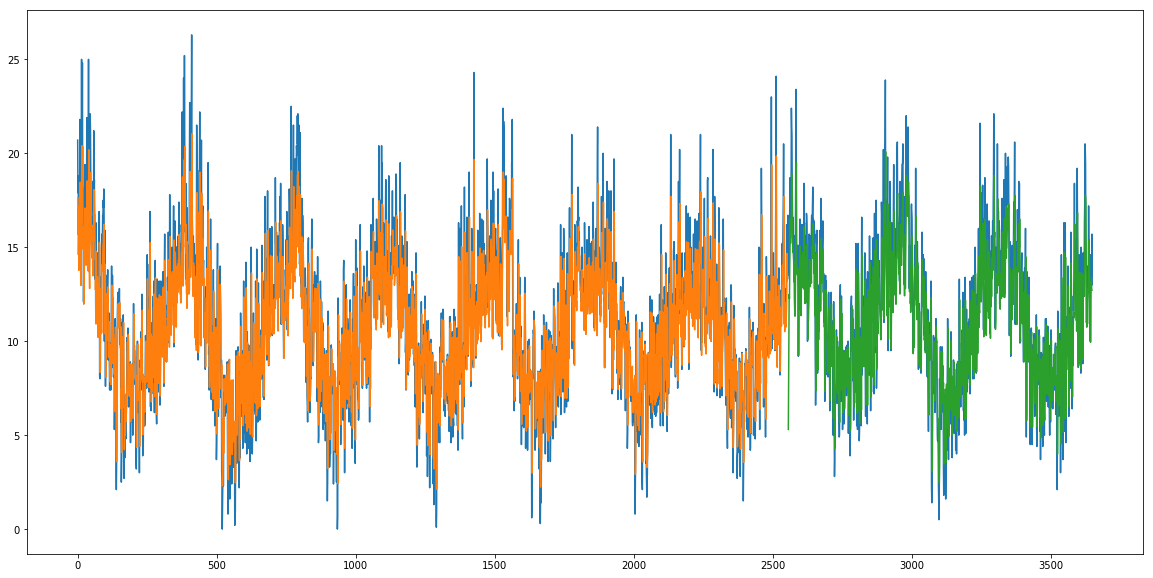

In [33]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()